### Projeto com Feedback - 04
### Prevendo Rotatividade de Clientes em uma Operadora de Telecom
### Autor: Glauco Júnior Carvalho

O termo customer churn (rotatividade de clientes) é uma métrica para avaliar quantos clientes a empresa perdeu até o final do período.

Uma empresa de telecom preocupada com o customer churn, pediu a nossa ajuda para construir um modelo capaz de prever se o cliente vai deixar ou não o plano, de acordo com a regra de lucratividade 20% dos clientes geram 80% da receita.

Então o nosso objetivo é prever os clientes que estão insatisfeitos com o plano e ter um tratamento especial para evitar o desligamento.

# Guia de Referência

    1. Importação de bibliotecas
    2. Importação de conjunto de dados
    3. Visualização e shape dos dados
    4. Alterando conjuntos de dados
    5. Visualização geral das distribuições dos dados
        5.1 Seaborn (pairplot)
        5.2 Matplotlib
    6. Análise exploratória e plotagem de gráficos
        6.1 Rotatividade (churn)
        6.2 Chamadas de serviços (cliente - operadora)
        6.3 Contas e rotatividade de clientes por Estado
        6.4 Correio de voz e rotatividade de clientes
        6.5 Total de crédito (carga) por Estado
        6.6 Rotatividade de clientes por serviços em períodos distintos
        6.7 Total de ligações por Estado
        6.8 Contas por área
        6.9 Ligações por área
        6.10 Chamados de serviços de clientes por área
        6.11 Rotatividade de clientes por área
        6.12 Contas por nacionalidade
        6.13 Ligações por nacionalidade
        6.14 Chamados de serviços de clientes por nacionalidade
        6.15 Rotatividade de clientes por nacionalidade
    7. Removendo colunas colineares
    8. Verificando tipos dos dados
    9. Transformando conjuntos de dados
    10. Verificando distribuição de rotatividade
        10.1 Treino
        10.2 Teste
    11. Separando variáveis preditoras de variável target
    12. Normalização e Padronização
        12.1 Normalização com MinMaxScaler
        12.2 Normalização com Normalizer
        12.3 Padronização com StandardScaler
    13. Modelo de Machine Learning e Regressão Logística (Logistic Regression)
        13.1 Regressão Logística com dados pré-processados, sem técnicas de normalização e padronização
        13.2 Regressão Logística em dados normalizados com MinMaxScaler
        13.3 Regressão Logística em dados normalizados com Normalizer
        13.4 Regressão Logística em dados padronizados com StandardScaler
        13.5 Otimização do Modelo Regressão Logística
    14. Feature Selection (Seleção de Variáveis)
        14.1 Regressão logística com feature selection
    15. Resumo de acurácia dos modelos
    16. Previsões, probabilidade e matriz de confusão

### 1. Importação de bibliotecas

In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

### 2. Importação de conjunto de dados

In [2]:
# Importando conjuntos de dados

train = pd.read_csv('projeto4_telecom_treino.csv')
test = pd.read_csv('projeto4_telecom_teste.csv')

### 3. Visualização e shape dos dados

In [3]:
train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
train.shape

(3333, 21)

In [5]:
test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [6]:
test.shape

(1667, 21)

### 4. Alterando conjuntos de dados

In [7]:
# Removendo coluna de índice redundante
del train['Unnamed: 0']; del test['Unnamed: 0']

# Inserindo coluna com o total de crédito por dia para análise
train['total_charge'] = train['total_day_charge'] + train['total_eve_charge'] + train['total_night_charge']

# Inserindo coluna com o total de ligações por dia para análise
train['total_calls'] = train['total_day_calls'] + train['total_eve_calls'] + train['total_night_calls']

### 5. Visualização geral das distribuições dos dados

#### 5.1 Seaborn (pairplot)
Faz plotagem de todas as variáveis, muito útil para análise da distribuição geral dos dados. Deixei o script comentado para poupar tempo de processamento do telespectador, caso deseje analisar como os dados estão distrubuídos remova o "#" da linha abaixo.

In [8]:
# sns.pairplot(train)

#### 5.2 Matplotlib
Com o matplotlib podemos analisar como estão as distribuição dos dados, analisaremos o histograma do conjunto de dados de treino.

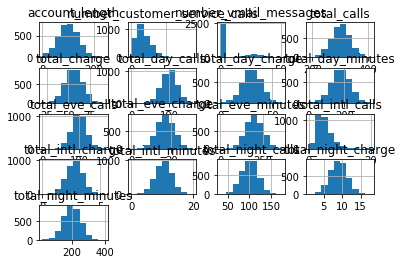

In [9]:
train.hist()
plt.show()

Podemos concluir que a maioria dos dados possui uma distribuição normal, esses gráficos em forma de "sino". Muitas vezes esse tratamento é feito pelo Engenheiro de Dados, Analista de Dados..., esse pré-processamento poupa um tempo considerável do Cientista de Dados.

### 6. Análise exploratória e plotagem de gráficos
#### 6.1 Rotatividade (churn)

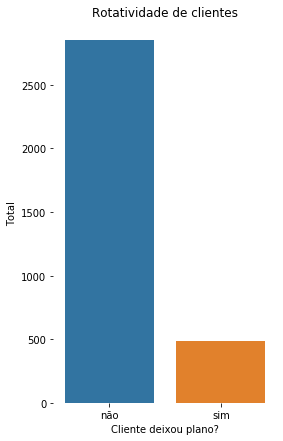

In [10]:
# Análise de rotatividade de clientes

churn_analytics = train.groupby('churn').size().\
                  to_frame('count').sort_values('count', ascending=False).reset_index()

churn_analytics['churn'] = \
['não' if x == 'no' else 'sim' for x in churn_analytics['churn']]

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(4, 7))

# Plotando gráfico de rotatividade de clientes
sns.set_color_codes("muted")
sns.barplot(x="churn", y="count", data=churn_analytics)

ax.set(title = "Rotatividade de clientes", ylabel = "Total", xlabel = "Cliente deixou plano?")
sns.despine(left=True, bottom=True)

#### 6.2 Chamadas de serviços (cliente - operadora)

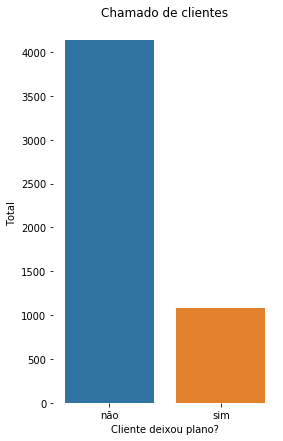

In [11]:
# Chamadas de serviços cliente - operadora

customer_service_call_analytics = train.groupby('churn')['number_customer_service_calls'].sum().\
                  to_frame('count').sort_values('count', ascending=False).reset_index()

customer_service_call_analytics['churn'] = \
['não' if x == 'no' else 'sim' for x in customer_service_call_analytics['churn']]

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(4, 7))

# Plotando gráfico de chamadas de serviços dos clientes
sns.set_color_codes("muted")
sns.barplot(x="churn", y="count", data=customer_service_call_analytics)

ax.set(title = "Chamado de clientes", ylabel = "Total", xlabel = "Cliente deixou plano?")
sns.despine(left=True, bottom=True)

#### 6.3 Contas e rotatividade de clientes por Estado
Esse gráfico apresenta 2 informações importantes, essas cores mais claras representam o tamanho das contas por estado, já a cor mais escura (vinho), representa os clientes que deixaram o plano.

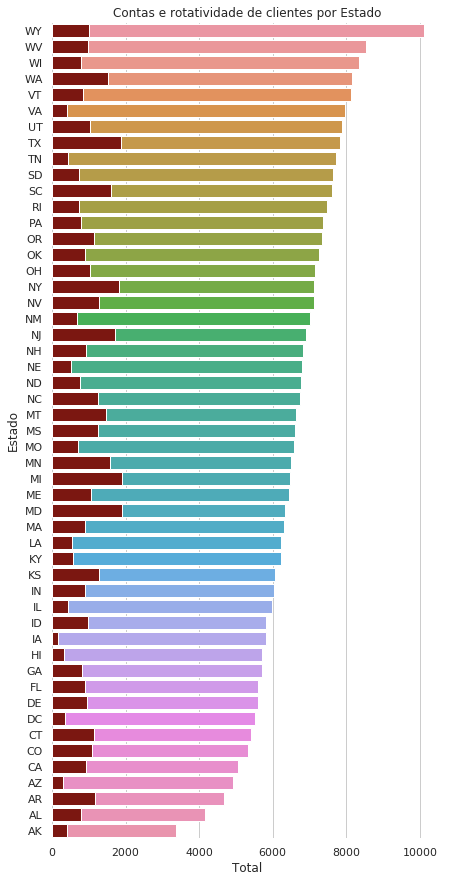

In [12]:
# Contas e rotatividade de clientes por Estado

sns.set(style="whitegrid")

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(7, 15))

state_churn_acc_length = train.groupby(['state', 'churn'])['account_length'].\
                   sum().to_frame('count').\
                   sort_values('count', ascending=False).reset_index()

state_total_acc_length = state_churn_acc_length.groupby('state').\
                   sum().sort_values('count', ascending=False).reset_index()

state_churn_yes_acc_length = state_churn_acc_length[state_churn_acc_length['churn'] == 'yes'].\
                             groupby('count').sum().sort_values('state', ascending=False).reset_index()

# Gráfico de contas por Estado
sns.set_color_codes("muted")
sns.barplot(x="count", y="state", data=state_total_acc_length);

# Gráfico de clientes que deixaram planos por Estado
sns.set_color_codes("dark")
sns.barplot(x="count", y="state", data=state_churn_yes_acc_length, color="r");

ax.set(title = "Contas e rotatividade de clientes por Estado", ylabel = "Estado", xlabel = "Total")
sns.despine(left=True, bottom=True);

#### 6.4 Correio de voz e rotatividade de clientes

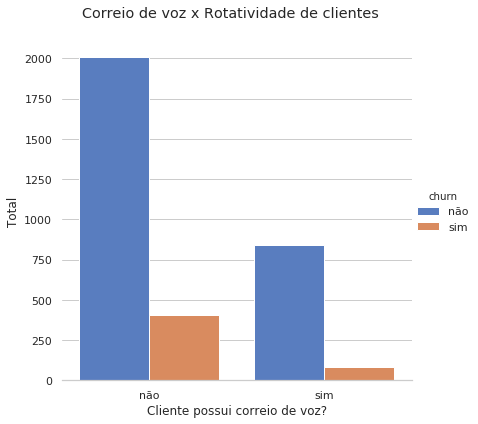

In [13]:
# Correio de voz e rotatividade de clientes

voice_mail_plan_churn = train.groupby(['voice_mail_plan', 'churn'])['churn'].\
                            size().to_frame('size').sort_values('size', ascending=False).\
                            reset_index()
voice_mail_plan_churn

voice_mail_plan_churn['churn'] = \
['não' if x == 'no' else 'sim' for x in voice_mail_plan_churn['churn']]

voice_mail_plan_churn['voice_mail_plan'] = \
['não' if x == 'no' else 'sim' for x in voice_mail_plan_churn['voice_mail_plan']]

g = sns.catplot(x='voice_mail_plan', y='size', hue='churn', data=voice_mail_plan_churn,
                height=6, kind='bar', palette='muted')
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("Cliente possui correio de voz?")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Correio de voz x Rotatividade de clientes');

#### 6.5 Total de crédito (carga) por Estado

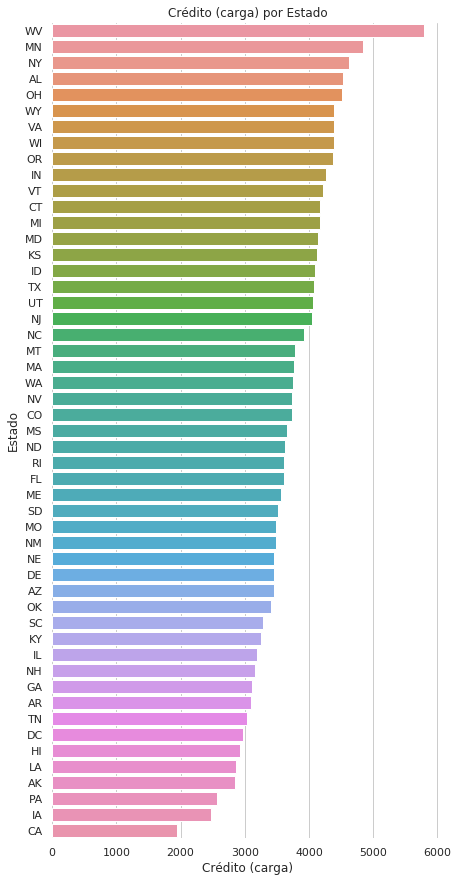

In [14]:
# Total de crédito (carga) por Estado

sns.set(style="whitegrid")

state_analytics_charge = train.groupby('state')['total_charge']\
                      .sum().to_frame('count').sort_values('count', ascending = False).reset_index()
state_analytics_charge

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(7, 15))

# Plotando gráfico de crédito (carga) por Estado
sns.set_color_codes("muted")
sns.barplot(x="count", y="state", data=state_analytics_charge)

ax.set(title = "Crédito (carga) por Estado", ylabel = "Estado", xlabel = "Crédito (carga)")
sns.despine(left=True, bottom=True)

#### 6.6 Rotatividade de clientes por serviços em períodos distintos

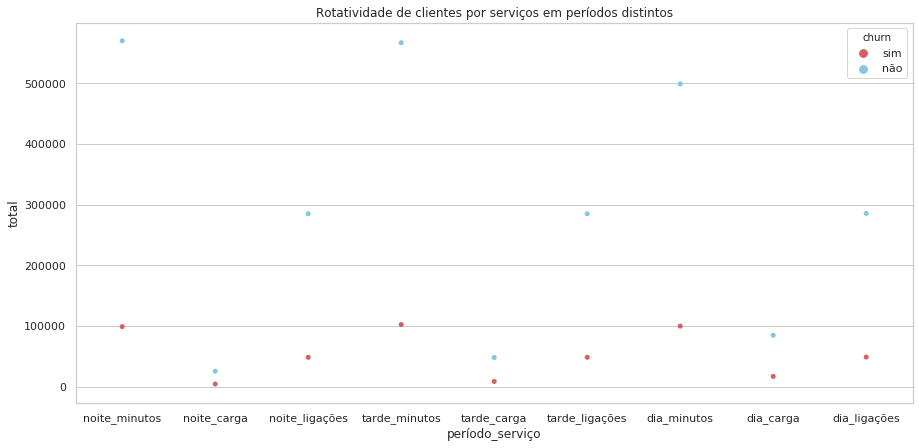

In [15]:
# Rotatividade de clientes por serviços em períodos distintos

time_melted = pd.melt(train, id_vars=['churn'], \
                      value_vars=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', \
                                  'total_day_calls', 'total_eve_calls', 'total_night_calls', \
                                  'total_day_charge', 'total_eve_charge', 'total_night_charge'], \
                      var_name = 'time', value_name = 'value')

time_melted_group = time_melted.groupby(['time', 'churn'])['value'].sum().\
                    to_frame('total').sort_values('time', ascending = False).reset_index()

time_melted_group['time'].replace('total_', '', regex=True, inplace=True)
time_melted_group['churn'].replace('yes', 'sim', regex=True, inplace=True)
time_melted_group['churn'].replace('no', 'não', regex=True, inplace=True)

# Tradução período e serviços
time_melted_group['time'].replace('day', 'dia', regex=True, inplace=True)
time_melted_group['time'].replace('eve', 'tarde', regex=True, inplace=True)
time_melted_group['time'].replace('night', 'noite', regex=True, inplace=True)

time_melted_group['time'].replace('minutes', 'minutos', regex=True, inplace=True)
time_melted_group['time'].replace('calls', 'ligações', regex=True, inplace=True)
time_melted_group['time'].replace('charge', 'carga', regex=True, inplace=True)


# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(15, 7))

sns.set(style="whitegrid", palette="muted")


# Gráfico de rotatividade por períodos
sns.swarmplot(x="time", y="total", hue="churn",
              palette=["r", "c", "r"], data=time_melted_group);

ax.set(title = "Rotatividade de clientes por serviços em períodos distintos",
       ylabel = "total", xlabel = "período_serviço");

#### 6.7 Total de ligações por Estado

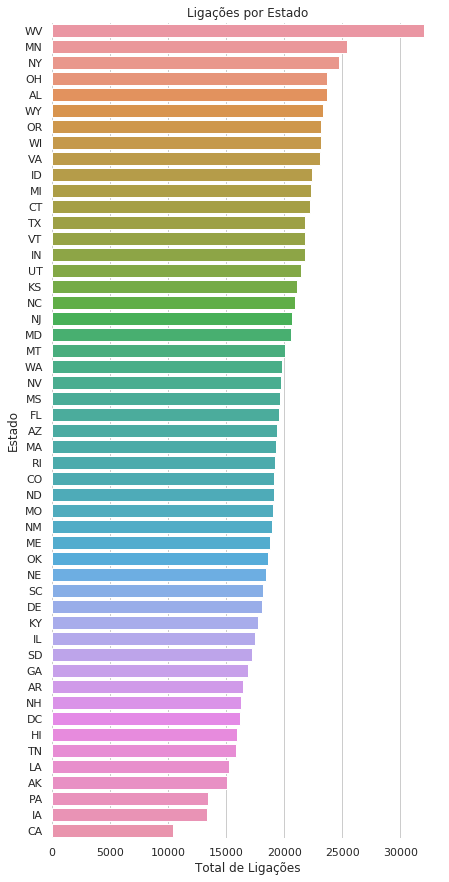

In [16]:
# Total de ligações por Estado

sns.set(style="whitegrid")

state_analytics_call = train.groupby('state')['total_calls']\
                      .sum().to_frame('count').sort_values('count', ascending = False).reset_index()
state_analytics_call

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(7, 15))

# Plotando gráfico de ligações por estado
sns.set_color_codes("muted")
sns.barplot(x="count", y="state", data=state_analytics_call)

ax.set(title = "Ligações por Estado", ylabel = "Estado", xlabel = "Total de Ligações")
sns.despine(left=True, bottom=True)

#### 6.8 Contas por área

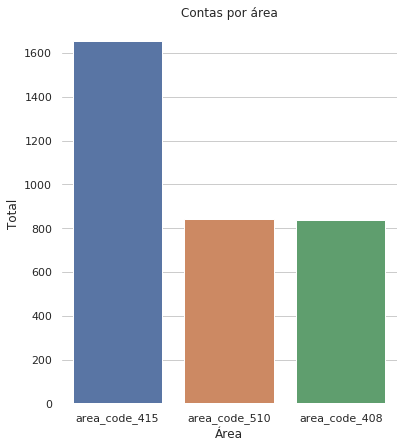

In [17]:
# Contas por área

area_analytics = train.groupby('area_code').size().\
                  to_frame('count').sort_values('count', ascending=False).reset_index()

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(6, 7))

# Plotando gráfico de contas por área
sns.set_color_codes("muted")
sns.barplot(x="area_code", y="count", data=area_analytics)

ax.set(title = "Contas por área", ylabel = "Total", xlabel = "Área")
sns.despine(left=True, bottom=True)

#### 6.9 Ligações por área

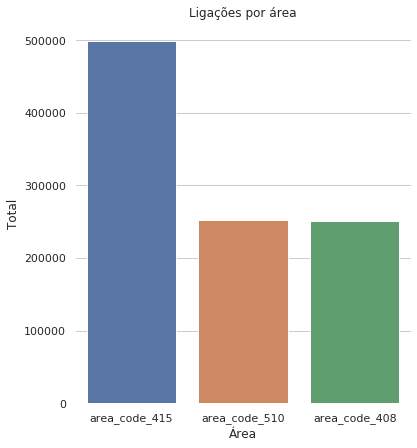

In [18]:
# Ligações por área

customer_service_area_analytics = train.groupby('area_code')['total_calls'].\
                                  sum().to_frame('count').sort_values('count', ascending=False).\
                                  reset_index()

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(6, 7))

# Plotando gráfico de ligações por área
sns.set_color_codes("muted")
sns.barplot(x="area_code", y="count", data=customer_service_area_analytics)

ax.set(title = "Ligações por área", ylabel = "Total", xlabel = "Área")
sns.despine(left=True, bottom=True)

#### 6.10 Chamados de serviços de clientes por área

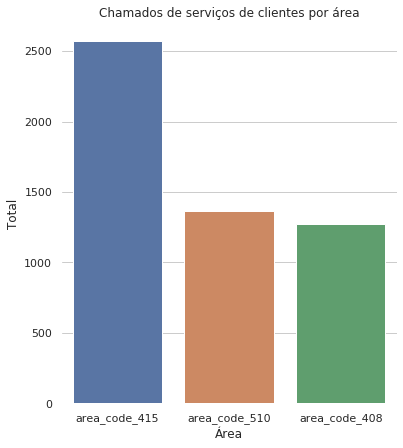

In [19]:
# Chamados de clientes por área

customer_service_area_analytics = train.groupby('area_code')['number_customer_service_calls'].\
                                  sum().to_frame('count').sort_values('count', ascending=False).\
                                  reset_index()

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(6, 7))

# Plotando gráfico de chamados de clientes por área
sns.set_color_codes("muted")
sns.barplot(x="area_code", y="count", data=customer_service_area_analytics)

ax.set(title = "Chamados de serviços de clientes por área", ylabel = "Total", xlabel = "Área")
sns.despine(left=True, bottom=True)

#### 6.11 Rotatividade de clientes por área

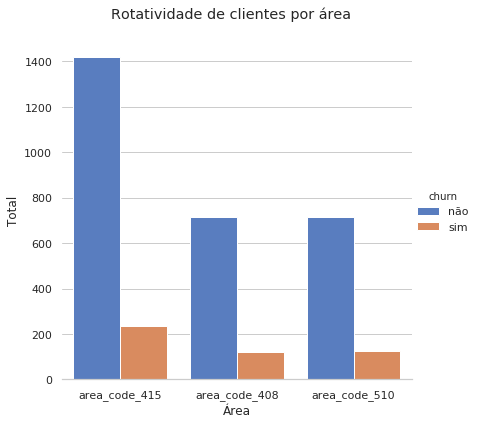

In [20]:
# Rotatividade de clientes por área

churn_analytics_area_code = train.groupby(['area_code', 'churn'])['churn'].\
                            size().to_frame('size').sort_values('size', ascending=False).\
                            reset_index()
churn_analytics_area_code

churn_analytics_area_code['churn'] = \
['não' if x == 'no' else 'sim' for x in churn_analytics_area_code['churn']]

g = sns.catplot(x='area_code', y='size', hue='churn', data=churn_analytics_area_code,
                height=6, kind='bar', palette='muted')
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("Área")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rotatividade de clientes por área');

#### 6.12 Contas por nacionalidade

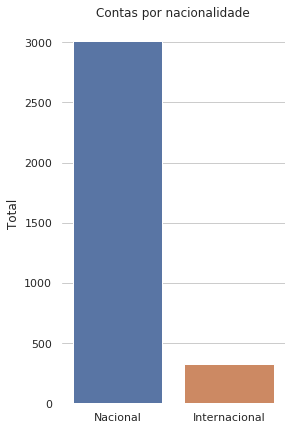

In [21]:
# Análise de contas por nacionalidade

international_plan_analytics = train.groupby('international_plan').size().to_frame('count').reset_index()
international_plan_analytics

international_plan_analytics['international_plan'] = \
['Nacional' if x == 'no' else 'Internacional' for x in international_plan_analytics['international_plan']]

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(4, 7))

# Plotando gráfico de contas por nacionalidade
sns.set_color_codes("muted")
sns.barplot(x="international_plan", y="count", data=international_plan_analytics)

ax.set(title = "Contas por nacionalidade", ylabel = "Total", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.13 Ligações por nacionalidade

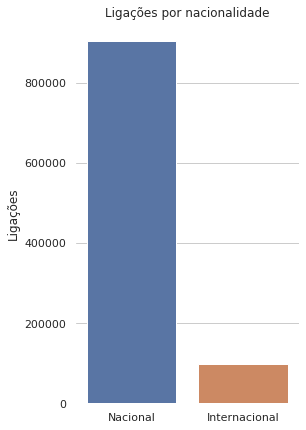

In [22]:
# Análise de ligações por nacionalidade

call_international_analytics = train.groupby('international_plan')['total_calls'].\
                               sum().to_frame('count').sort_values('count', ascending=False).\
                               reset_index()

call_international_analytics['international_plan'] = \
['Nacional' if x == 'no' else 'Internacional' for x in call_international_analytics['international_plan']]

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(4, 7))

# Plotando gráfico de ligações por nacionalidade
sns.set_color_codes("muted")
sns.barplot(x="international_plan", y="count", data=call_international_analytics)

ax.set(title = "Ligações por nacionalidade", ylabel = "Ligações", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.14 Chamados de serviços de clientes por nacionalidade

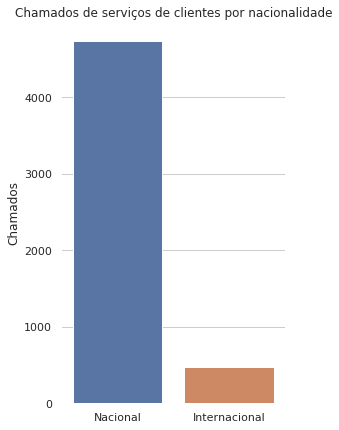

In [23]:
# Análise de chamados de serviços de clientes por nacionalidade

call_international_analytics = train.groupby('international_plan')['number_customer_service_calls'].\
                               sum().to_frame('count').sort_values('count', ascending=False).\
                               reset_index()

call_international_analytics['international_plan'] = \
['Nacional' if x == 'no' else 'Internacional' for x in call_international_analytics['international_plan']]

# Inicializando a figura do gráfico
f, ax = plt.subplots(figsize=(4, 7))

# Plotando gráfico de chamados de serviços
sns.set_color_codes("muted")
sns.barplot(x="international_plan", y="count", data=call_international_analytics)

ax.set(title = "Chamados de serviços de clientes por nacionalidade", ylabel = "Chamados", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.15 Rotatividade de clientes por nacionalidade

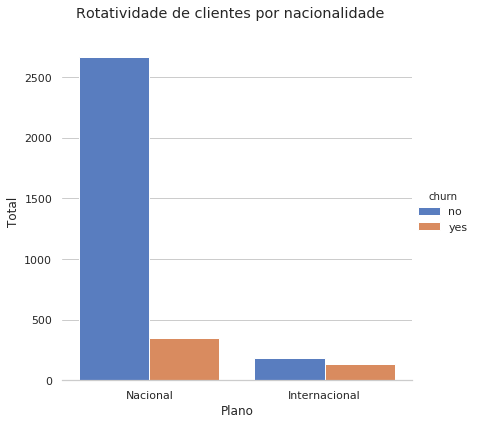

In [24]:
# Rotatividade de clientes por nacionalidade

churn_analytics_international = train.groupby(['international_plan', 'churn'])['churn'].\
                                size().to_frame('size').sort_values('size', ascending=False).\
                                reset_index()

churn_analytics_international['international_plan'] = \
['Nacional' if x == 'no' else 'Internacional' for x in churn_analytics_international['international_plan']]


g = sns.catplot(x='international_plan', y='size', hue='churn', data=churn_analytics_international,
                height=6, kind='bar', palette='muted')
g.despine(left=True)
g.set_ylabels("Total")
g.set_xlabels("Plano")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rotatividade de clientes por nacionalidade');

### 7. Removendo colunas colineares

In [25]:
# Removendo colunas com informações colineares

del train['total_calls'] ; del train['total_charge']

### 8. Verificando tipos dos dados

In [26]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

### 9. Transformando conjuntos de dados

In [27]:
# Transformando variáveis categóricas em variáveis numéricas e
# removendo colunas irrelevantes para o modelo

# Dados de treino

# Retornando valores unicode para cada letra de estado
train['state_int'] = 0
count = 0
for st in train.state:
    train.state_int.loc[count] = sum([ord(state) for state in st])
    count = count + 1

# Removendo coluna colinear com informação de estado
del train['state']

# Removendo coluna irrelevante, contém muitos valores 0's
# Trazendo prejuiízo na predição do modelo
del train['number_vmail_messages']

train['area_code'] = \
[415 if x == 'area_code_415' else \
 408 if x == 'area_code_408' else \
 510 if x == 'area_code_510' else x for x in train['area_code']]

train['international_plan'] = \
[0 if x == 'no' else 1 for x in train['international_plan']]

train['voice_mail_plan'] = \
[0 if x == 'no' else 1 for x in train['voice_mail_plan']]

train['churn'] = \
[0 if x == 'no' else 1 for x in train['churn']]

# Dados de teste

#retornando valores unicode para cada letra de estado
test['state_int'] = 0
count = 0
for st in test.state:
    test.state_int.loc[count] = sum([ord(state) for state in st])
    count = count + 1
    
del test['state']

# Removendo coluna irrelevante, contém muitos valores 0's
# Trazendo prejuiízo na predição do modelo
del test['number_vmail_messages']

test['area_code'] = \
[415 if x == 'area_code_415' else \
 408 if x == 'area_code_408' else \
 510 if x == 'area_code_510' else x for x in test['area_code']]

test['international_plan'] = \
[0 if x == 'no' else 1 for x in test['international_plan']]

test['voice_mail_plan'] = \
[0 if x == 'no' else 1 for x in test['voice_mail_plan']]

test['churn'] = \
[0 if x == 'no' else 1 for x in test['churn']]

### 10. Verificando distribuição de rotatividade
#### 10.1 Treino

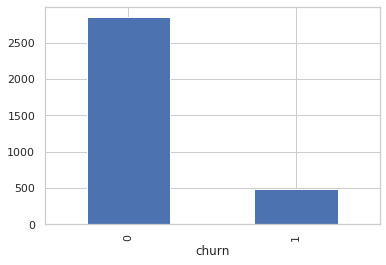

In [28]:
# Verificar distribuição de rotatividade nos dados de treino

train_dist_analytics = train.groupby('churn').size().plot(kind="bar")

#### 10.2 Teste

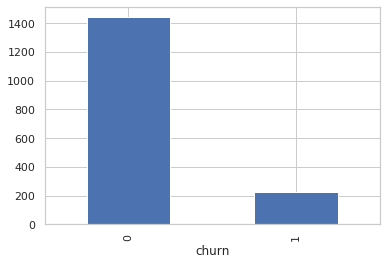

In [29]:
# Verificar distribuição de rotatividade nos dados de teste

test_dist_analytics = test.groupby('churn').size().plot(kind="bar")

Podemos analisar que os dados de treino e teste possuem uma distribuição balanceada, evitando o Overfitting (sobreajuste) e Underfitting (subajuste).
docs.aws.amazon.com/pt_br/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

### 11. Separando variáveis preditoras de variável target

In [30]:
# Separar as variáveis preditoras da variável target

# Dados de treino
X_train = train.drop(['churn'], axis = 1)
Y_train = train['churn']

# Dados de teste
X_test = test.drop(['churn'], axis = 1)
Y_test = test['churn']

### 12. Normalização e Padronização

Quando os nossos dados estão em escalas diferentes o algoritmo pode não obter o melhor resultado, sendo necessário muitas vezes normalizar ou padronizar.

Normalização e Padronização tem objetivo semelhante, ambas servem para transformar os dados para mesma grandeza, porém o resultado da padronização é média = 0 e desvio padrão igual a 1.

Utilizaremos as funções do Sklearn para normalizar e padronizar e em seguida testaremos com o modelo de Regressão Logística.

#### 12.1 Normalização com MinMaxScaler

In [31]:
# Normalizando dados com MinMaxScaler

# Escala
scaler = MinMaxScaler(feature_range = (0, 1))

# Aplicando modelo para reescala
X_train_minmaxscaler = scaler.fit_transform(X_train)
X_test_minmaxscaler = scaler.fit_transform(X_test)

#### 12.2 Normalização com Normalizer

In [32]:
# Normalizando dados com Normalizer

scaler = Normalizer().fit(X_train)
X_train_normalizer = scaler.transform(X_train)

scaler = Normalizer().fit(X_test)
X_test_normalizer = scaler.transform(X_test)

#### 12.3 Padronização com StandardScaler

In [33]:
# Padronizando dados com StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_standardscaler = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_standardscaler = scaler.transform(X_test)

### 13. Modelo de Machine Learning e Regressão Logística (Logistic Regression)

Utilizaremos o modelo de Machine Learning de classificação - LogisticRegression (Regressão Logística), para prever se o cliente vai deixar o plano ou não, abordaremos diversas técnicas de pré-processamento, normalização e padronização nos dados de entrada.

#### 13.1 Regressão Logística com dados pré-processados, sem técnicas de normalização e padronização

In [34]:
# Regressão Logística em dados sem técnicas de normalização e padronização

# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_without_rescaler = LogisticRegression()
model_LR_without_rescaler.fit(X_train, Y_train)

# Score do modelo LR
result_LR_without_rescaler = model_LR_without_rescaler.score(X_test, Y_test)


print("Acurácia: %.3f%%" % (result_LR_without_rescaler * 100.0))

Acurácia: 86.683%


#### 13.2 Regressão Logística em dados normalizados com MinMaxScaler

In [35]:
# Regressão logística em dados normalizados com MinMaxScaler

# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_minmaxscaler = LogisticRegression()
model_LR_minmaxscaler.fit(X_train_minmaxscaler, Y_train)

# Score do modelo LR
result_LR_minmaxscaler = model_LR_minmaxscaler.score(X_test_minmaxscaler, Y_test)

print("Acurácia: %.3f%%" % (result_LR_minmaxscaler * 100.0))

Acurácia: 86.503%


#### 13.3 Regressão Logística em dados normalizados com Normalizer

In [36]:
# Regressão logística em dados normalizados com Normalizer

# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_normalizer = LogisticRegression()
model_LR_normalizer.fit(X_train_normalizer, Y_train)

# Score do modelo LR
result_LR_normalizer = model_LR_normalizer.score(X_test_normalizer, Y_test)

print("Acurácia: %.3f%%" % (result_LR_normalizer * 100.0))

Acurácia: 86.563%


####  13.4 Regressão Logística em dados padronizados com StandardScaler

In [37]:
# Regressão logística em dados padronizados com StandardScaler

# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_standardscaler = LogisticRegression()
model_LR_standardscaler.fit(X_train_standardscaler, Y_train)

# Score do modelo LR
result_LR_standardscaler = model_LR_standardscaler.score(X_test_standardscaler, Y_test)

print("Acurácia: %.3f%%" % (result_LR_standardscaler * 100.0))

Acurácia: 86.983%


#### 13.5 Otimização do Modelo Regressão Logística

O algoritmo pode receber alguns parâmetros para aumentar a performance do modelo, dentre inúmeras técnicas nós utilizaremos o GridSearchCV para testar várias possibilidades.

In [38]:
# Aplicando métodos de otimização em modelo de regressão logística

param_resume_values = {'penalty': ['l2'],
                       'C': [1,10,100],
                       'solver': ['lbfgs', 'liblinear'],
                       'max_iter': [100, 500]}

# Para economizar tempo de processamento, deixarei comentando
# Caso queira testar mais parâmetros, descomentar as linhas abaixo

# param_full_values = {'penalty': ['l1','l2'],
#                      'C': [0.1,1,10,100,1000],
#                      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                      'max_iter': [100, 500, 1000]}


# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_opt = LogisticRegression()

# GRID
grid_LR_opt = GridSearchCV(model_LR_opt, param_grid = param_resume_values)
grid_LR_opt.fit(X_train, Y_train)

print("Acurácia: %.3f" % (grid_LR_opt.best_score_ * 100))
print("Melhores Parâmetros de : ", grid_LR_opt.best_estimator_)

Acurácia: 86.349
Melhores Parâmetros de :  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 14. Feature Selection (Seleção de Variáveis)

A técnica de feature selection muitas vezes é importante, sendo capaz de criar um rank para as variáveis que têm uma melhor acurácia para predição do modelo.

In [39]:
# Feature Selection (Seleção de Variáveis)

# Criação do Modelo - Feature Selection
model_LR_feature_selection = LogisticRegression()

# RFE
rfe = RFE(model_LR_feature_selection, 5)
fit = rfe.fit(X_train, Y_train)

feature_importance_LR = pd.DataFrame({"feature" : train.drop(['churn'], axis = 1).columns, "value" : fit.support_}).\
                        sort_values('value', ascending = False)

feature_importance_LR_true = feature_importance_LR[feature_importance_LR['value'] == True]['feature']

X_train_LR_feature = pd.DataFrame(data = X_train, columns = X_train.columns)
X_test_LR_feature = pd.DataFrame(data = X_test, columns = X_test.columns)

X_train_LR_feature = X_train_LR_feature[feature_importance_LR_true]
X_test_LR_feature = X_test_LR_feature[feature_importance_LR_true]

#### 14.1 Regressão logística com feature selection

In [40]:
# Regressão logística com feature selection

# Criação do modelo Logistic Regression (Regressão Logística)
model_LR_feature_selected = LogisticRegression()
model_LR_feature_selected.fit(X_train_LR_feature, Y_train)

# Score do modelo LR
result_LR_feature_selected = model_LR_feature_selected.score(X_test_LR_feature, Y_test)

print("Acurácia nos dados de teste: %.3f%%" % (result_LR_feature_selected * 100.0))

Acurácia nos dados de teste: 87.283%


### 15. Resumo de acurácia dos modelos

In [41]:
# Resumo de acurácia de modelos

result_dict = {"LR_without_rescaler" : result_LR_without_rescaler * 100,
               "LR_minmaxscaler" : result_LR_minmaxscaler * 100,
               "LR_normalizer" : result_LR_normalizer * 100,
               "LR_standardscaler" : result_LR_standardscaler * 100,
               "LR_feature_selected" : result_LR_feature_selected * 100}

result_df = pd.DataFrame(data = result_dict, index=["total"]).T.sort_values('total', ascending = False)

result_df

,total
LR_feature_selected,87.282543
LR_standardscaler,86.982603
LR_without_rescaler,86.682663
LR_normalizer,86.562687
LR_minmaxscaler,86.502699


No nosso caso, a técnica de feature selection nos ajudou a obter uma melhor acurácia, tornando-se o melhor modelo deste projeto.

### 16. Previsões, probabilidade e matriz de confusão

In [42]:
# Realizando as previsões, construindo um resumo de probabilidade e matriz de confusão
LR_feature_selected_predict = model_LR_feature_selected.predict(X_test_LR_feature)
matrix = confusion_matrix(Y_test, LR_feature_selected_predict)


LR_feature_selected_prob = model_LR_feature_selected.predict_proba(X_test_LR_feature)
#matrix_prob = confusion_matrix(Y_test, LR_feature_selected_prob)

LR_feature_selected_prob

class1 = [prob[0] for prob in LR_feature_selected_prob]
class2 = [prob[1] for prob in LR_feature_selected_prob]

print("Cliente deixou plano?  NÃO:", round(sum(class1) / len(class1), 2), "%",
                           "| SIM:", round(sum(class2) / len(class2), 2), "%")
print()
print("Confusion Matrix:")
print(matrix)

Cliente deixou plano?  NÃO: 0.85 % | SIM: 0.15 %

Confusion Matrix:
[[1420   23]
 [ 189   35]]


<h3> Utilizamos o melhor modelo para fazer as previsões de probabilidades se um cliente vai deixar ou não o plano, o modelo que obteve uma melhor acurácia foi o de regressão logística com a técnica de feature selection. </h3>

<h3> Com isso podemos concluir que 85% dos clientes não deixarão o plano e 15% deixarão, a operadora com o objetivo de não perder esses clientes pode lançar campanhas de marketing e promoções. </h3>

<h3> A matriz de confusão serve para avaliarmos o desempenho do nosso algoritmo, faz um cruzamento dos dados previstos com os nossos resultados de referência. </h3>

<h3> Matriz de Confusão: </h3>
    <ul> 1ª linha e 1ª coluna = verdadeiro positivo; </ul>
    <ul> 1ª linha e 2ª coluna = falso negativo; </ul>
    <ul> 2ª linha e 1ª coluna = falso positivo; </ul>
    <ul> 2ª linha e 2ª coluna = verdadeiro negativo; </ul>